# Explore the SPEC dataset
The SPEC dataset consists of six subsets, each focusing on a specific visual-linguistic concept. \
In this notebook, we will explore the data in SPEC step-by-step to help users establish a comprehensive understanding of SPEC.

## 1. How to use this notebook?
You can run this notebook locally, before running, make sure that you have prepared the environment. \
You can also directly run this online notebook: [![online notebook](https://img.shields.io/badge/colab-notebook-yellow)](https://colab.research.google.com/github/wjpoom/SPEC/blob/main/notebooks/explore_spec_colab.ipynb).

## 2. Import packages

In [1]:
%matplotlib inline
import zipfile
import os
import random
import matplotlib.pyplot as plt

from spec import get_data
from huggingface_hub import hf_hub_download

## 3. Prepare the data
Download the SPEC dataset from HuggingFace and uncompress it.

In [3]:
# specify the path to save the downloaded and extracted the data
data_root = '/path/to/save/data'
# download *.zip files
hf_hub_download(repo_id='wjpoom/SPEC', repo_type='dataset', filename='data.zip', local_dir=data_root)
# extract *.zip files
with zipfile.ZipFile(os.path.join(data_root, 'data.zip'), 'r') as zip_ref:
    zip_ref.extractall(os.path.join(data_root))
# remove the *.zip files
os.remove(os.path.join(data_root, 'data.zip'))
print(f'The SPEC dataset is prepared at: {data_root}.')

## 4. Helper functions
Let's define some useful helper functions for data visualization.

In [6]:
def show_img2txt_sample(sample):
    """explore the `image to text` sample"""
    print('\n################### Image To Text Retrieval Sample #####################\n')
    # show query image
    print('Query image:')
    plt.imshow(sample['query_image'])
    plt.axis('off') 
    plt.show()
    # show candidate texts
    string='\n'.join([f'   {i}: {text}' for i, text in enumerate(sample['candidate_texts'])])
    print(f'Candidate texts:\n{string}\n')
    # show true label
    print(f"True text:\n   {sample['label']}:", sample['candidate_texts'][sample['label']])

def show_txt2img_sample(sample):
    """explore the `text to image` sample"""
    print('\n################### Text To Image Retrieval Sample #####################\n')
    # show query text
    print('Query text:\n  ', t2i_sample['query_text'])
    print(f'\nCandidate images:')
    # show candidate images
    num_candidate_images = len(t2i_sample['candidate_images'])
    cols, rows = min(num_candidate_images, 3), (num_candidate_images - 1) // 3 + 1
    fig, axes = plt.subplots(rows, cols, figsize=(10, 6))
    for i, ax in enumerate(axes.flat):
        ax.axis('off')
        if i < num_candidate_images:
            ax.imshow(t2i_sample['candidate_images'][i])
    plt.subplots_adjust(wspace=0.1, hspace=0.2)
    plt.show()
    # show true label
    print('True image:')
    plt.imshow(t2i_sample['candidate_images'][t2i_sample['label']])
    plt.axis('off') 
    plt.show()

def show_statistics(subset):
    i2t_dataset = subset['i2t_dataloader'].dataset
    t2i_dataset = subset['t2i_dataloader'].dataset
    i2t_sample = i2t_dataset[0]
    t2i_sample = t2i_dataset[0]
    print('\n###########################   Statistics   #############################\n')
    print(f"There are <{len(i2t_dataset)}> `image-to-text` sample, each sample requires to match <1> query image with <{len(i2t_sample['candidate_texts'])}> candidate texts")
    print(f"There are <{len(t2i_dataset)}> `text-to-image` sample, each sample requires to match <1> query text with <{len(t2i_sample['candidate_images'])}> candidate images")

## 5. Let's Explore SPEC!

### 5.1 Absolute size subset


###########################   Statistics   #############################

There are <1500> `image-to-text` sample, each sample requires to match <1> query image with <3> candidate texts
There are <1500> `text-to-image` sample, each sample requires to match <1> query text with <3> candidate images

################### Image To Text Retrieval Sample #####################

Query image:


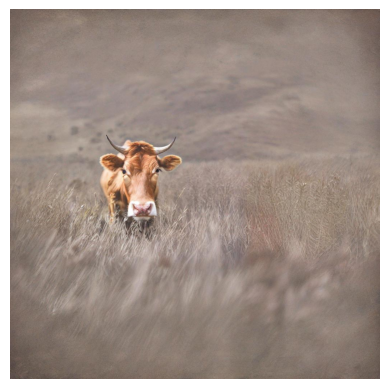

Candidate texts:
   0: the cow is relatively large within the image.
   1: the cow is relatively medium-sized within the image.
   2: the cow is relatively tiny within the image.

True text:
   2: the cow is relatively tiny within the image.

################### Text To Image Retrieval Sample #####################

Query text:
   the cow is relatively tiny within the image.

Candidate images:


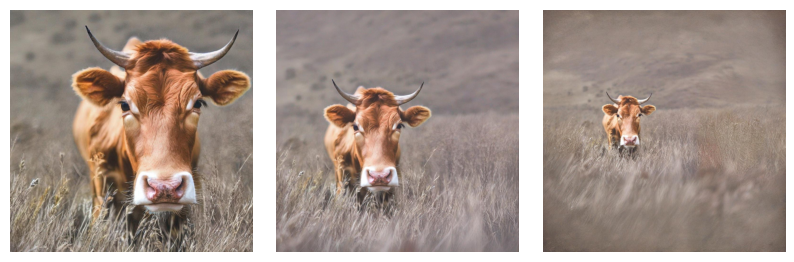

True image:


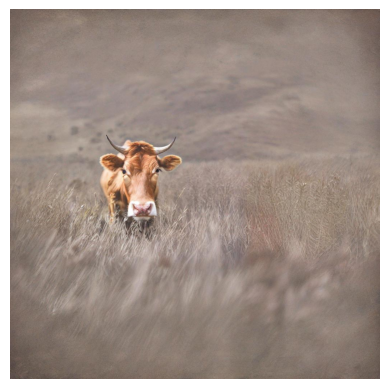

In [7]:
# load dataset
subset_name = 'absolute_size'
subset = get_data(data_root=data_root, subset_names=[subset_name], image_preprocess=None, batch_size=1, num_workers=1)[subset_name]
i2t_dataset = subset['i2t_dataloader'].dataset
t2i_dataset = subset['t2i_dataloader'].dataset
# show statistics
show_statistics(subset)
# ramdomly select a sample
idx = random.choice(range(1000))
i2t_sample = i2t_dataset[idx]
t2i_sample = t2i_dataset[idx]
# explore the `image to text` sample
show_img2txt_sample(i2t_sample)
# explore the `text to image sample`
show_txt2img_sample(t2i_sample)

### 5.2 Relative size subset


###########################   Statistics   #############################

There are <1500> `image-to-text` sample, each sample requires to match <1> query image with <3> candidate texts
There are <1500> `text-to-image` sample, each sample requires to match <1> query text with <3> candidate images

################### Image To Text Retrieval Sample #####################

Query image:


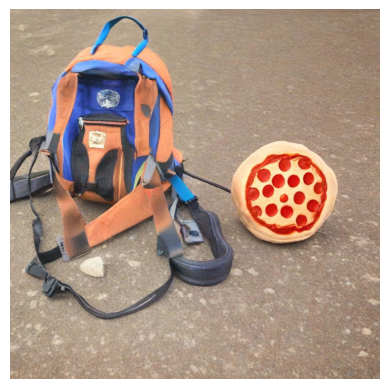

Candidate texts:
   0: the backpack is smaller in size/scale than the pizza.
   1: the backpack and the pizza are equally sized.
   2: the backpack is larger than the pizza in size/scale.

True text:
   2: the backpack is larger than the pizza in size/scale.

################### Text To Image Retrieval Sample #####################

Query text:
   the backpack is larger than the pizza in size/scale.

Candidate images:


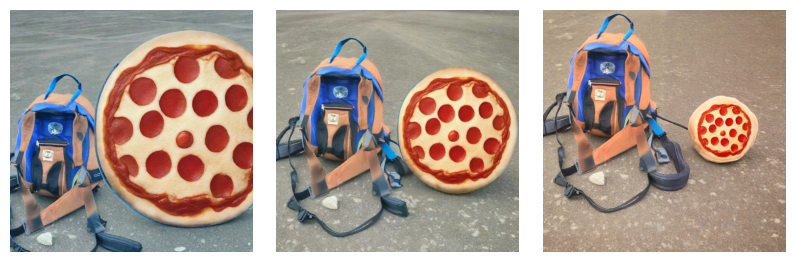

True image:


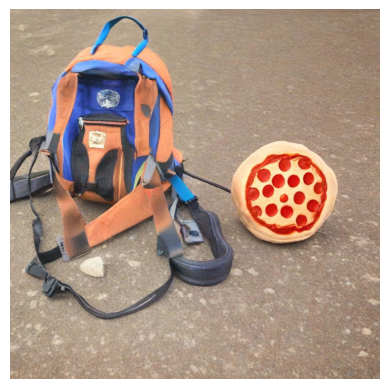

In [9]:
# load dataset
subset_name = 'relative_size'
subset = get_data(data_root=data_root, subset_names=[subset_name], image_preprocess=None, batch_size=1, num_workers=1)[subset_name]
i2t_dataset = subset['i2t_dataloader'].dataset
t2i_dataset = subset['t2i_dataloader'].dataset
# show statistics
show_statistics(subset)
# ramdomly select a sample
idx = random.choice(range(1000))
i2t_sample = i2t_dataset[idx]
t2i_sample = t2i_dataset[idx]
# show statistics

# explore the `image to text` sample
show_img2txt_sample(i2t_sample)
# explore the `text to image sample`
show_txt2img_sample(t2i_sample)

### 5.3 Absolute spatial subset


###########################   Statistics   #############################

There are <4500> `image-to-text` sample, each sample requires to match <1> query image with <9> candidate texts
There are <4500> `text-to-image` sample, each sample requires to match <1> query text with <9> candidate images

################### Image To Text Retrieval Sample #####################

Query image:


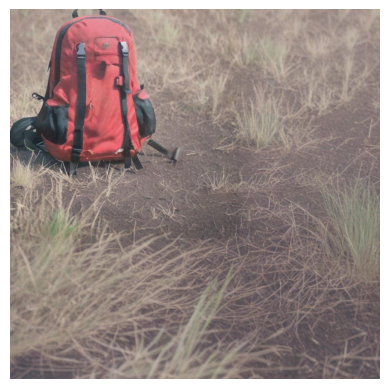

Candidate texts:
   0: the backpack is in the top-left corner of the image.
   1: the backpack is positioned at the upper part of the image.
   2: the backpack is situated in the upper-right corner of the image.
   3: the backpack is to the left of the image.
   4: the backpack occupies the central position of the image.
   5: the backpack is situated on the right side of the image.
   6: the backpack is situated in the lower-left part of the image.
   7: the backpack is at the lower end of the image.
   8: the backpack is in the bottom-right corner of the image.

True text:
   0: the backpack is in the top-left corner of the image.

################### Text To Image Retrieval Sample #####################

Query text:
   the backpack is in the top-left corner of the image.

Candidate images:


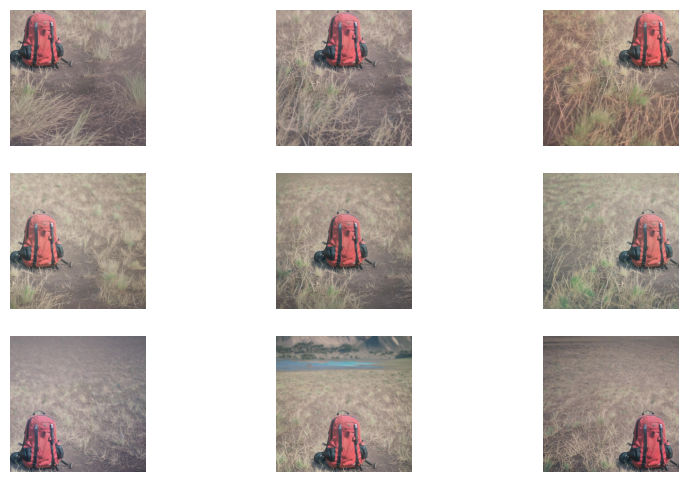

True image:


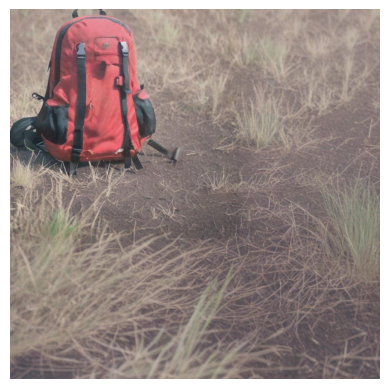

In [10]:
# load dataset
subset_name = 'absolute_spatial'
subset = get_data(data_root=data_root, subset_names=[subset_name], image_preprocess=None, batch_size=1, num_workers=1)[subset_name]
i2t_dataset = subset['i2t_dataloader'].dataset
t2i_dataset = subset['t2i_dataloader'].dataset
# show statistics
show_statistics(subset)
# ramdomly select a sample
idx = random.choice(range(1000))
i2t_sample = i2t_dataset[idx]
t2i_sample = t2i_dataset[idx]
# explore the `image to text` sample
show_img2txt_sample(i2t_sample)
# explore the `text to image sample`
show_txt2img_sample(t2i_sample)

### 5.4 Relative spatial subset


###########################   Statistics   #############################

There are <2000> `image-to-text` sample, each sample requires to match <1> query image with <4> candidate texts
There are <2000> `text-to-image` sample, each sample requires to match <1> query text with <4> candidate images

################### Image To Text Retrieval Sample #####################

Query image:


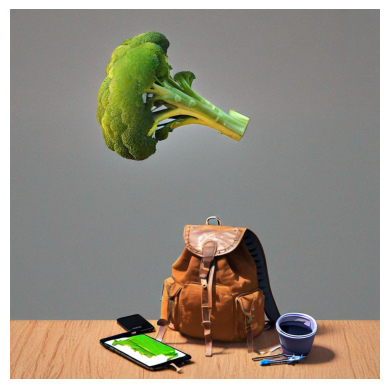

Candidate texts:
   0: the broccoli is positioned on the left of the backpack.
   1: the broccoli is situated above the backpack.
   2: the broccoli is situated to the right of the backpack.
   3: the broccoli is placed beneath the backpack.

True text:
   1: the broccoli is situated above the backpack.

################### Text To Image Retrieval Sample #####################

Query text:
   the broccoli is situated above the backpack.

Candidate images:


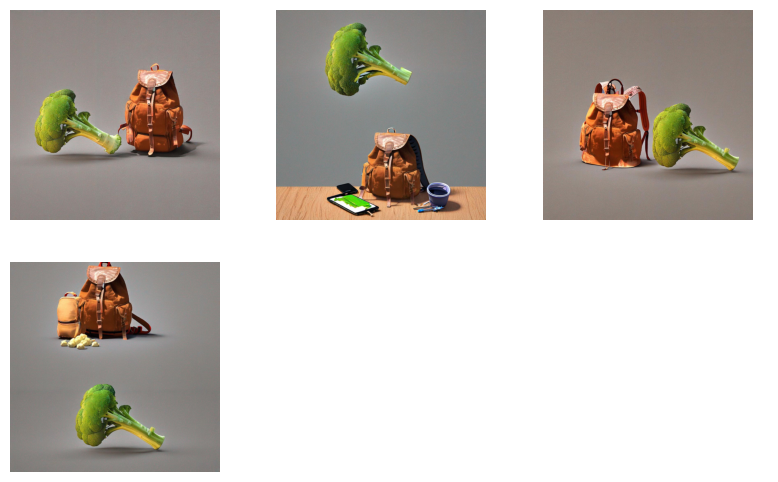

True image:


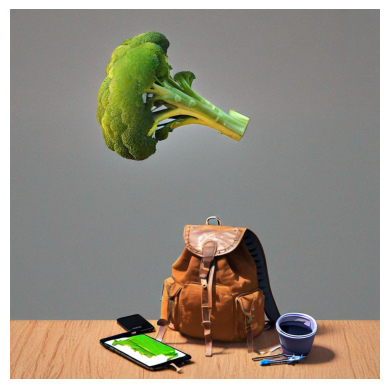

In [11]:
# load dataset
subset_name = 'relative_spatial'
subset = get_data(data_root=data_root, subset_names=[subset_name], image_preprocess=None, batch_size=1, num_workers=1)[subset_name]
i2t_dataset = subset['i2t_dataloader'].dataset
t2i_dataset = subset['t2i_dataloader'].dataset
# show statistics
show_statistics(subset)
# ramdomly select a sample
idx = random.choice(range(1000))
i2t_sample = i2t_dataset[idx]
t2i_sample = t2i_dataset[idx]
# explore the `image to text` sample
show_img2txt_sample(i2t_sample)
# explore the `text to image sample`
show_txt2img_sample(t2i_sample)

### 5.5 Existence subset


###########################   Statistics   #############################

There are <1000> `image-to-text` sample, each sample requires to match <1> query image with <2> candidate texts
There are <1000> `text-to-image` sample, each sample requires to match <1> query text with <2> candidate images

################### Image To Text Retrieval Sample #####################

Query image:


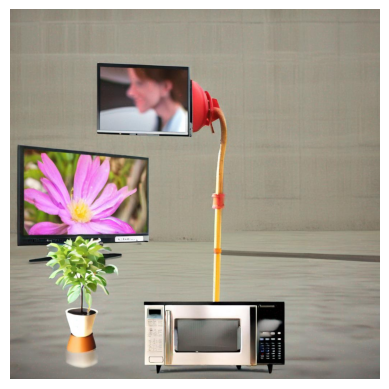

Candidate texts:
   0: there is no microwave in the image.
   1: a photo with a microwave.

True text:
   1: a photo with a microwave.

################### Text To Image Retrieval Sample #####################

Query text:
   a photo with a microwave.

Candidate images:


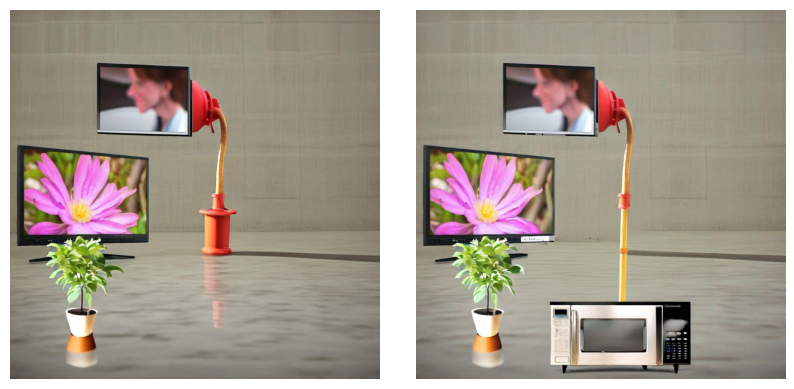

True image:


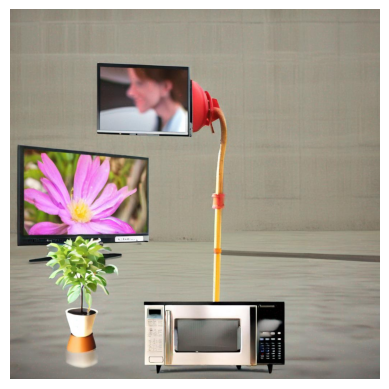

In [12]:
# load dataset
subset_name = 'existence'
subset = get_data(data_root=data_root, subset_names=[subset_name], image_preprocess=None, batch_size=1, num_workers=1)[subset_name]
i2t_dataset = subset['i2t_dataloader'].dataset
t2i_dataset = subset['t2i_dataloader'].dataset
# show statistics
show_statistics(subset)
# ramdomly select a sample
idx = random.choice(range(1000))
i2t_sample = i2t_dataset[idx]
t2i_sample = t2i_dataset[idx]
# explore the `image to text` sample
show_img2txt_sample(i2t_sample)
# explore the `text to image sample`
show_txt2img_sample(t2i_sample)

### 5.6 Count subset


###########################   Statistics   #############################

There are <4500> `image-to-text` sample, each sample requires to match <1> query image with <9> candidate texts
There are <4500> `text-to-image` sample, each sample requires to match <1> query text with <9> candidate images

################### Image To Text Retrieval Sample #####################

Query image:


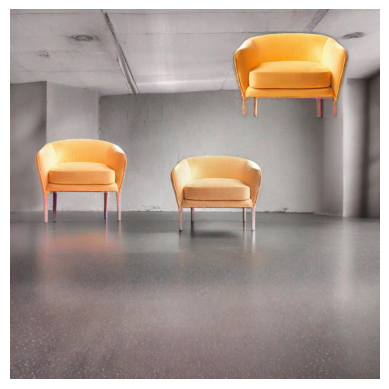

Candidate texts:
   0: a picture of one sofa.
   1: a picture of two sofa.
   2: a photo of three sofa.
   3: a view of four sofa.
   4: a picture of five sofa.
   5: a photograph capturing six sofa.
   6: a view of seven sofa.
   7: a photograph capturing eight sofa.
   8: a view of nine sofa.

True text:
   2: a photo of three sofa.

################### Text To Image Retrieval Sample #####################

Query text:
   a photo of three sofa.

Candidate images:


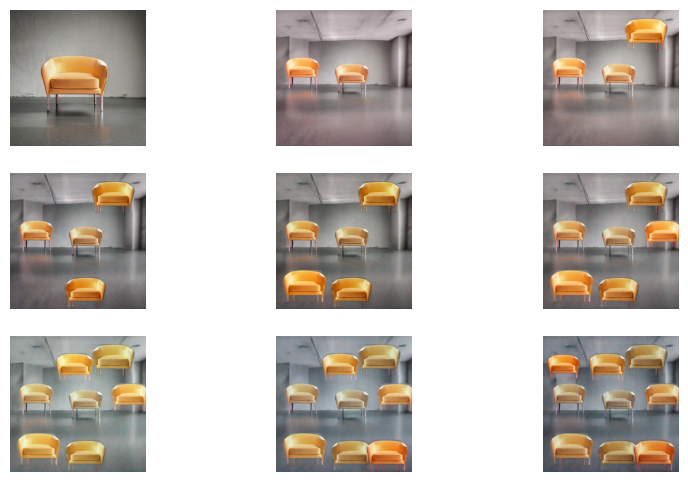

True image:


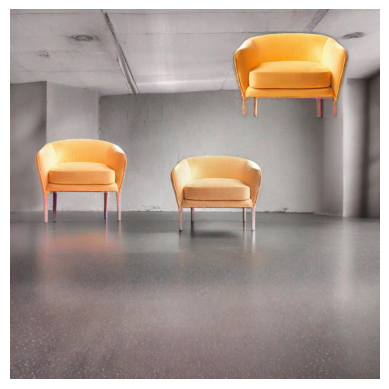

In [13]:
# load dataset
subset_name = 'count'
subset = get_data(data_root=data_root, subset_names=[subset_name], image_preprocess=None, batch_size=1, num_workers=1)[subset_name]
i2t_dataset = subset['i2t_dataloader'].dataset
t2i_dataset = subset['t2i_dataloader'].dataset
# show statistics
show_statistics(subset)
# ramdomly select a sample
idx = random.choice(range(1000))
i2t_sample = i2t_dataset[idx]
t2i_sample = t2i_dataset[idx]
# explore the `image to text` sample
show_img2txt_sample(i2t_sample)
# explore the `text to image sample`
show_txt2img_sample(t2i_sample)

## 6. What's Next?
We are building a new version of the dataset with a larger data scale, more object categories, higher quality images and text, and more. \
You can preview the new version of the data [here]()!